# Setup

In [1]:
import os
import sys
from pathlib import Path

# Add source directory to system path
source_dir = str(Path(os.getcwd()).parent / 'src')
sys.path.append(source_dir)

# Dataset

Data(edge_index=[2, 168], x=[49, 1], y=[1])
Label: 7


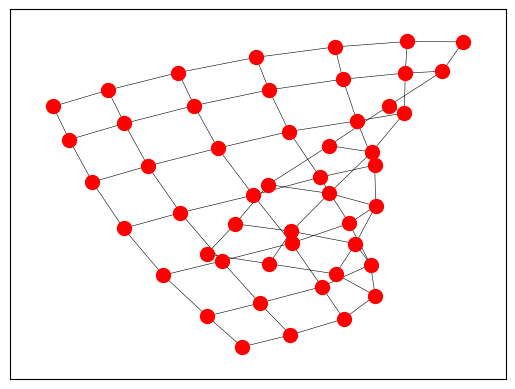

In [6]:

import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from torch_geometric.utils import to_networkx
from data import GridDataset


root = str(Path(os.getcwd()).parent / 'data' / 'MNISTGridTrain')
dataset = GridDataset(root=root)
sample = dataset[int(np.random.sample()*len(dataset))]
print(sample)
print("Label: {}".format(sample.y[0].cpu().numpy()))
G = to_networkx(sample, to_undirected=True)
nx.draw_networkx(G, with_labels=False, node_size=100, node_color="red", width=0.4)

# Model (GraphSAGE)

In [8]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 2
convLayerType = 'sage'
dropout = 0.2

model = GNN(1, hiddenSize, 10, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 30538
GNN(
  (convs): ModuleList(
    (0): GraphSage(1, 64)
    (1): GraphSage(64, 64)
    (2): GraphSage(64, 64)
    (3): GraphSage(64, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [10]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'sage_mnist_grid', model, optimizer, replace=False)
trainer.train(dataset, batchSize=64)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/sage_mnist_grid
Number of Saved Checkpoints Found: 0


  1%|▏         | 10/797 [06:09<8:04:33, 36.94s/it]


KeyboardInterrupt: 

# Model (GAT)

In [4]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 4
convLayerType = 'gat'
dropout = 0.2
model = GNN(dataset.num_features, hiddenSize, dataset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout, heads=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 60746
GNN(
  (convs): ModuleList(
    (0): GAT(1, 64)
    (1): GAT(128, 64)
    (2): GAT(128, 64)
    (3): GAT(128, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


In [5]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat', model, optimizer, replace=False)
trainer.train(dataset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat
Number of Saved Checkpoints Found: 2


100%|██████████| 797/797 [00:23<00:00, 34.17it/s]


Epoch 11 | Training Loss: 0.94483 | Train Acc.: 0.6887 | Valid Acc.: 0.6861


100%|██████████| 797/797 [00:21<00:00, 36.99it/s]


Epoch 12 | Training Loss: 0.93658 | Train Acc.: 0.6906 | Valid Acc.: 0.6944


100%|██████████| 797/797 [00:21<00:00, 36.91it/s]


Epoch 13 | Training Loss: 0.91706 | Train Acc.: 0.6990 | Valid Acc.: 0.4728


100%|██████████| 797/797 [00:21<00:00, 36.96it/s]


Epoch 14 | Training Loss: 0.91294 | Train Acc.: 0.7004 | Valid Acc.: 0.6893


100%|██████████| 797/797 [00:21<00:00, 36.34it/s]


Epoch 15 | Training Loss: 0.90673 | Train Acc.: 0.7000 | Valid Acc.: 0.5390


100%|██████████| 797/797 [00:21<00:00, 36.83it/s]


Epoch 16 | Training Loss: 0.89215 | Train Acc.: 0.7064 | Valid Acc.: 0.7064


100%|██████████| 797/797 [00:21<00:00, 36.64it/s]


Epoch 17 | Training Loss: 0.88904 | Train Acc.: 0.7080 | Valid Acc.: 0.4989


100%|██████████| 797/797 [00:22<00:00, 35.21it/s]


Epoch 18 | Training Loss: 0.89564 | Train Acc.: 0.7080 | Valid Acc.: 0.5866


100%|██████████| 797/797 [00:21<00:00, 36.99it/s]


Epoch 19 | Training Loss: 0.88756 | Train Acc.: 0.7096 | Valid Acc.: 0.7223


100%|██████████| 797/797 [00:21<00:00, 36.81it/s]


Epoch 20 | Training Loss: 0.88213 | Train Acc.: 0.7110 | Valid Acc.: 0.6149


100%|██████████| 797/797 [00:21<00:00, 37.13it/s]


Epoch 21 | Training Loss: 0.88653 | Train Acc.: 0.7110 | Valid Acc.: 0.4179


100%|██████████| 797/797 [00:21<00:00, 37.26it/s]


Epoch 22 | Training Loss: 0.89160 | Train Acc.: 0.7080 | Valid Acc.: 0.4819


100%|██████████| 797/797 [00:21<00:00, 37.24it/s]


Epoch 23 | Training Loss: 0.88149 | Train Acc.: 0.7117 | Valid Acc.: 0.6932


100%|██████████| 797/797 [00:21<00:00, 37.20it/s]


Epoch 24 | Training Loss: 0.87667 | Train Acc.: 0.7146 | Valid Acc.: 0.7496


100%|██████████| 797/797 [00:21<00:00, 37.41it/s]


Epoch 25 | Training Loss: 0.86917 | Train Acc.: 0.7153 | Valid Acc.: 0.5076


100%|██████████| 797/797 [00:21<00:00, 37.07it/s]


Epoch 26 | Training Loss: 0.86882 | Train Acc.: 0.7185 | Valid Acc.: 0.5043


100%|██████████| 797/797 [00:21<00:00, 37.20it/s]


Epoch 27 | Training Loss: 0.87624 | Train Acc.: 0.7113 | Valid Acc.: 0.6643


100%|██████████| 797/797 [00:21<00:00, 37.18it/s]


Epoch 28 | Training Loss: 0.87843 | Train Acc.: 0.7133 | Valid Acc.: 0.5533


100%|██████████| 797/797 [00:21<00:00, 37.18it/s]


Epoch 29 | Training Loss: 0.86556 | Train Acc.: 0.7160 | Valid Acc.: 0.7083


100%|██████████| 797/797 [00:21<00:00, 37.21it/s]


Epoch 30 | Training Loss: 0.86154 | Train Acc.: 0.7199 | Valid Acc.: 0.6851


100%|██████████| 797/797 [00:21<00:00, 37.23it/s]


Epoch 31 | Training Loss: 0.85783 | Train Acc.: 0.7190 | Valid Acc.: 0.7080


100%|██████████| 797/797 [00:21<00:00, 37.06it/s]


Epoch 32 | Training Loss: 0.87356 | Train Acc.: 0.7157 | Valid Acc.: 0.6752


100%|██████████| 797/797 [00:21<00:00, 36.31it/s]


Epoch 33 | Training Loss: 0.87728 | Train Acc.: 0.7137 | Valid Acc.: 0.7242


100%|██████████| 797/797 [00:21<00:00, 37.17it/s]


Epoch 34 | Training Loss: 0.86841 | Train Acc.: 0.7165 | Valid Acc.: 0.6087


100%|██████████| 797/797 [00:21<00:00, 37.18it/s]


Epoch 35 | Training Loss: 0.87450 | Train Acc.: 0.7149 | Valid Acc.: 0.7580


100%|██████████| 797/797 [00:21<00:00, 36.85it/s]


Epoch 36 | Training Loss: 0.86165 | Train Acc.: 0.7171 | Valid Acc.: 0.4568


100%|██████████| 797/797 [00:21<00:00, 37.27it/s]


Epoch 37 | Training Loss: 0.88008 | Train Acc.: 0.7117 | Valid Acc.: 0.6252


100%|██████████| 797/797 [00:21<00:00, 37.21it/s]


Epoch 38 | Training Loss: 0.86349 | Train Acc.: 0.7189 | Valid Acc.: 0.5749


100%|██████████| 797/797 [00:21<00:00, 37.20it/s]


Epoch 39 | Training Loss: 0.86344 | Train Acc.: 0.7164 | Valid Acc.: 0.4617


100%|██████████| 797/797 [00:21<00:00, 37.24it/s]


Epoch 40 | Training Loss: 0.87142 | Train Acc.: 0.7143 | Valid Acc.: 0.6186


100%|██████████| 797/797 [00:21<00:00, 37.22it/s]


Epoch 41 | Training Loss: 0.86508 | Train Acc.: 0.7156 | Valid Acc.: 0.7246


100%|██████████| 797/797 [00:21<00:00, 37.02it/s]


Epoch 42 | Training Loss: 0.87100 | Train Acc.: 0.7156 | Valid Acc.: 0.5331


100%|██████████| 797/797 [00:21<00:00, 37.28it/s]


Epoch 43 | Training Loss: 0.87362 | Train Acc.: 0.7156 | Valid Acc.: 0.3518


100%|██████████| 797/797 [00:21<00:00, 37.26it/s]


Epoch 44 | Training Loss: 0.86399 | Train Acc.: 0.7180 | Valid Acc.: 0.5694


100%|██████████| 797/797 [00:21<00:00, 36.61it/s]


Epoch 45 | Training Loss: 0.88645 | Train Acc.: 0.7094 | Valid Acc.: 0.7386


100%|██████████| 797/797 [00:21<00:00, 37.01it/s]


Epoch 46 | Training Loss: 0.84478 | Train Acc.: 0.7220 | Valid Acc.: 0.6707


100%|██████████| 797/797 [00:21<00:00, 36.59it/s]


Epoch 47 | Training Loss: 0.86110 | Train Acc.: 0.7190 | Valid Acc.: 0.7299


100%|██████████| 797/797 [00:21<00:00, 37.27it/s]


Epoch 48 | Training Loss: 0.85237 | Train Acc.: 0.7178 | Valid Acc.: 0.2490


100%|██████████| 797/797 [00:21<00:00, 36.71it/s]


Epoch 49 | Training Loss: 0.86968 | Train Acc.: 0.7178 | Valid Acc.: 0.4317


100%|██████████| 797/797 [00:22<00:00, 35.75it/s]


Epoch 50 | Training Loss: 0.86547 | Train Acc.: 0.7139 | Valid Acc.: 0.4067


100%|██████████| 797/797 [00:22<00:00, 35.60it/s]


Epoch 51 | Training Loss: 0.87549 | Train Acc.: 0.7148 | Valid Acc.: 0.6702


100%|██████████| 797/797 [00:21<00:00, 36.39it/s]


Epoch 52 | Training Loss: 0.86413 | Train Acc.: 0.7157 | Valid Acc.: 0.5774


100%|██████████| 797/797 [00:22<00:00, 35.61it/s]


Epoch 53 | Training Loss: 0.86237 | Train Acc.: 0.7199 | Valid Acc.: 0.7469


100%|██████████| 797/797 [00:21<00:00, 36.67it/s]


Epoch 54 | Training Loss: 0.86670 | Train Acc.: 0.7163 | Valid Acc.: 0.7023


100%|██████████| 797/797 [00:22<00:00, 35.97it/s]


Epoch 55 | Training Loss: 0.86275 | Train Acc.: 0.7143 | Valid Acc.: 0.5744


100%|██████████| 797/797 [00:21<00:00, 36.40it/s]


Epoch 56 | Training Loss: 0.88587 | Train Acc.: 0.7115 | Valid Acc.: 0.5557


100%|██████████| 797/797 [00:22<00:00, 36.20it/s]


Epoch 57 | Training Loss: 0.87889 | Train Acc.: 0.7142 | Valid Acc.: 0.4781


100%|██████████| 797/797 [00:21<00:00, 36.42it/s]


Epoch 58 | Training Loss: 0.86135 | Train Acc.: 0.7173 | Valid Acc.: 0.6593


100%|██████████| 797/797 [00:21<00:00, 36.72it/s]


Epoch 59 | Training Loss: 0.88006 | Train Acc.: 0.7109 | Valid Acc.: 0.5429


100%|██████████| 797/797 [00:22<00:00, 36.09it/s]


Epoch 60 | Training Loss: 0.86766 | Train Acc.: 0.7169 | Valid Acc.: 0.7112


100%|██████████| 797/797 [00:21<00:00, 36.74it/s]


Epoch 61 | Training Loss: 0.87287 | Train Acc.: 0.7152 | Valid Acc.: 0.7347


100%|██████████| 797/797 [00:22<00:00, 35.85it/s]


Epoch 62 | Training Loss: 0.87111 | Train Acc.: 0.7144 | Valid Acc.: 0.4239


100%|██████████| 797/797 [00:22<00:00, 35.84it/s]


Epoch 63 | Training Loss: 0.86132 | Train Acc.: 0.7172 | Valid Acc.: 0.5606


100%|██████████| 797/797 [00:21<00:00, 36.24it/s]


Epoch 64 | Training Loss: 0.85823 | Train Acc.: 0.7194 | Valid Acc.: 0.6711


100%|██████████| 797/797 [00:21<00:00, 36.78it/s]


Epoch 65 | Training Loss: 0.86399 | Train Acc.: 0.7150 | Valid Acc.: 0.7171


100%|██████████| 797/797 [00:21<00:00, 36.35it/s]


Epoch 66 | Training Loss: 0.86688 | Train Acc.: 0.7176 | Valid Acc.: 0.6961


100%|██████████| 797/797 [00:21<00:00, 36.55it/s]


Epoch 67 | Training Loss: 0.87324 | Train Acc.: 0.7128 | Valid Acc.: 0.6584


 36%|███▌      | 284/797 [00:07<00:14, 35.78it/s]


KeyboardInterrupt: 